### Exercício 10 realizado por Alícia Gouveia e Sofia Rodrigues

Using the dataset in EFIplus_medit.zip:

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage as linkage_function
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [2]:
#Load the dataset
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

df

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
0,ES_01_0002,38.102003,-4.096070,Spain,Guadalquivir,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,ES_02_0001,40.530188,-1.887796,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,ES_02_0002,40.595432,-1.928079,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,ES_02_0003,40.656184,-1.989831,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,ES_02_0004,40.676402,-2.036274,Spain,Tejo,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Drop NaN values
df = df.dropna()

# Display the column names (header names) of the dataset
print(df.columns.tolist())

df

['Site_code', 'Latitude', 'Longitude', 'Country', 'Catchment_name', 'Galiza', 'Subsample', 'Calib_EFI_Medit', 'Calib_connect', 'Calib_hydrol', 'Calib_morphol', 'Calib_wqual', 'Geomorph1', 'Geomorph2', 'Geomorph3', 'Water_source_type', 'Flow_regime', 'Altitude', 'Geological_typology', 'Actual_river_slope', 'Natural_sediment', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul', 'Barriers_catchment_down', 'Barriers_river_segment_up', 'Barriers_river_segment_down', 'Barriers_number_river_segment_up', 'Barriers_number_river_segment_down', 'Barriers_distance_river_segment_up', 'Barriers_distance_river_segment_down', 'Impoundment', 'Hydropeaking', 'Water_abstraction', 'Hydro_mod', 'Temperature_impact', 'Velocity_increase', 'Reservoir_flushing', 'Sedimentation', 'Channelisation', 'Cross_sec', 'Instream_habitat', 'Riparian_vegetation', 'Embankment', 'Floodprotection', 'Floodplain', 'Toxic_substances', 'Acidification', 'Water_quality_index', 'Eutrophication', 'Organic_p

,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5006,PTVO60,40.641612,-8.325149,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5007,PTVO61,40.729015,-8.098851,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5008,PTVO62,40.727959,-8.107344,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5009,PTVO63,40.817783,-8.224903,Portugal,Vouga,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


1.Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the Douro and Tejo basins. Produce a biplot with ‘ Catchment_name ’ as a grouping variable

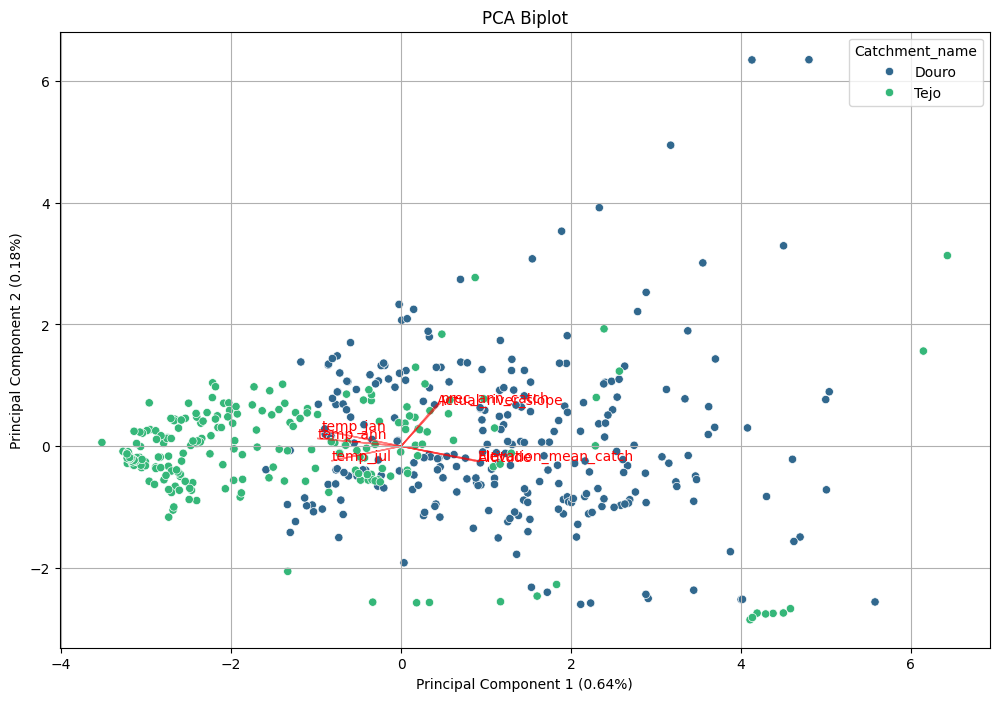

In [6]:
# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pc_df['Catchment_name'] = douro_tejo_df['Catchment_name'].values

# Plot biplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Catchment_name', data=pc_df, palette='viridis')

# Plot arrows for loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
for i, var in enumerate(quant_vars):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0], loadings[i, 1], var, color='r')

plt.title('PCA Biplot')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2f}%)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2f}%)')
plt.grid()
plt.show()


2.Using the same data, run a PCoA and project the sites using the resulting first two axis. Use also the Catchment_name ’ as a grouping variable.

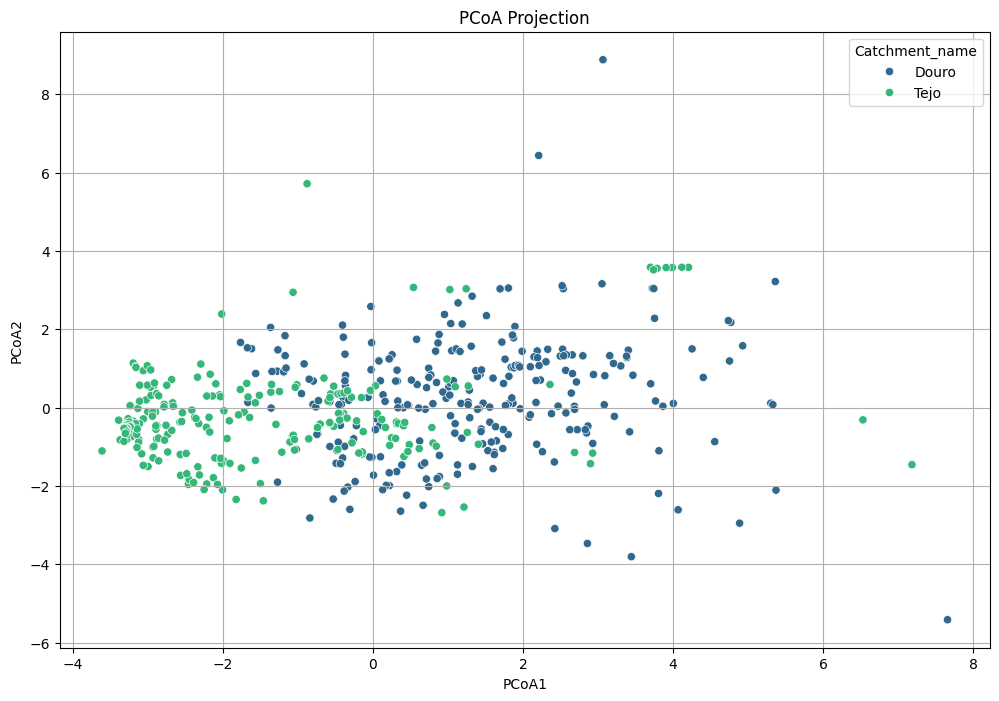

In [8]:
# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute the distance matrix
distance_matrix = pairwise_distances(X_scaled, metric='euclidean')

# Perform PCoA (Classical MDS)
pcoa = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
pcoa_components = pcoa.fit_transform(distance_matrix)
pcoa_df = pd.DataFrame(data=pcoa_components, columns=['PCoA1', 'PCoA2'])
pcoa_df['Catchment_name'] = douro_tejo_df['Catchment_name'].values

# Plot PCoA results
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCoA1', y='PCoA2', hue='Catchment_name', data=pcoa_df, palette='viridis')
plt.title('PCoA Projection')
plt.xlabel('PCoA1')
plt.ylabel('PCoA2')
plt.grid()
plt.show()


3.Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous exercises), using the Douro and Tejo basins as the pre determined groups. Produce a biplot with Catchment_name ’ as a grouping variable.

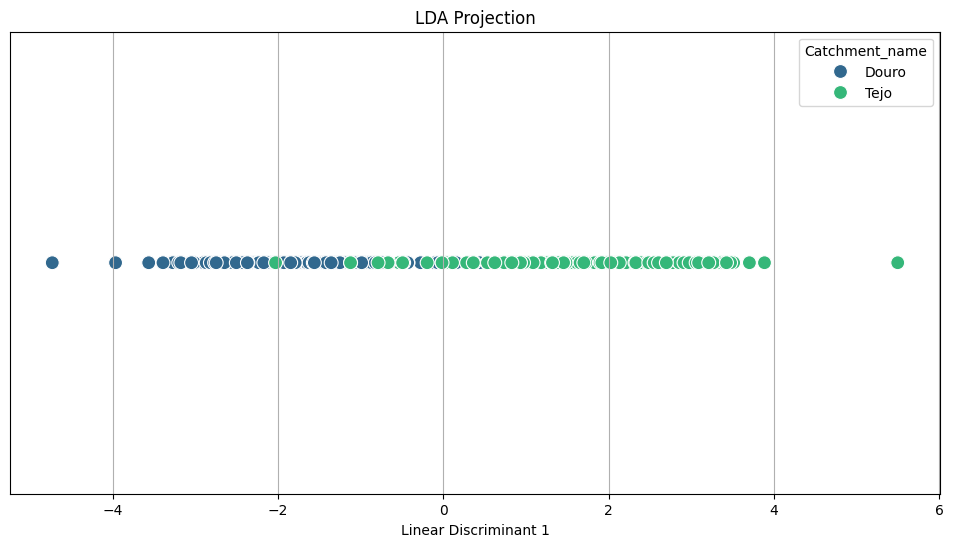

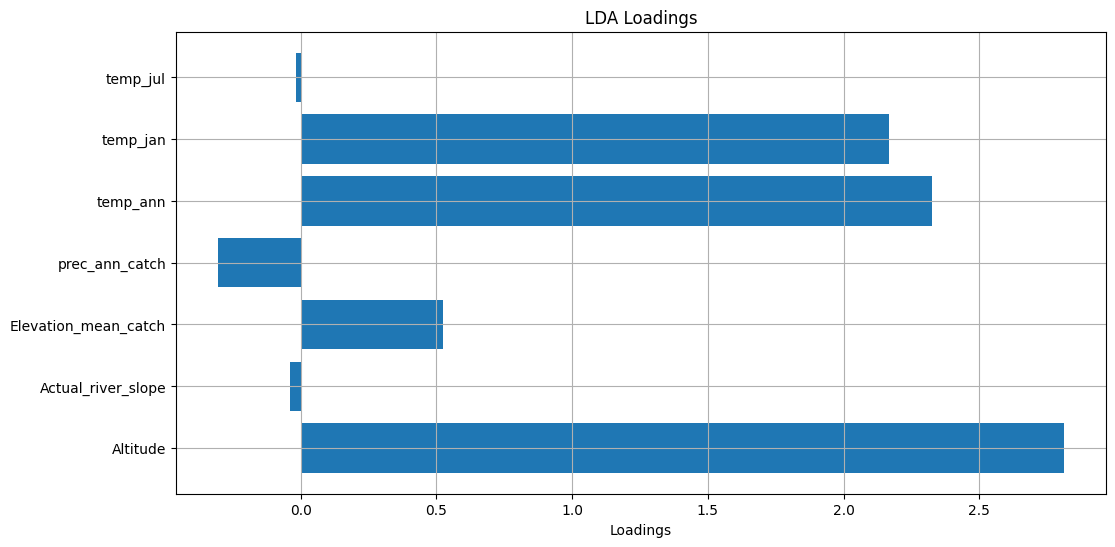

In [16]:
# Subset data for Douro and Tejo basins
douro_tejo_df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])]

# Extract quantitative environmental variables
quant_vars = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
X = douro_tejo_df[quant_vars]
y = douro_tejo_df['Catchment_name']

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform LDA
lda = LDA(n_components=1)
lda_components = lda.fit_transform(X_scaled, y)
lda_df = pd.DataFrame(data=lda_components, columns=['LD1'])
lda_df['Catchment_name'] = douro_tejo_df['Catchment_name'].values

# Plot LDA results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LD1', y=[0] * len(lda_df), hue='Catchment_name', data=lda_df, palette='viridis', s=100)
plt.title('LDA Projection')
plt.xlabel('Linear Discriminant 1')
plt.yticks([])
plt.grid()

# Show the plot
plt.show()

# Bar plot for the variable contributions
plt.figure(figsize=(12, 6))
loadings = lda.scalings_[:, 0]
plt.barh(quant_vars, loadings)
plt.xlabel('Loadings')
plt.title('LDA Loadings')
plt.grid()
plt.show()